get the data directory

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
dir_path = r'C:\Users\matty\Videos\CODES\Ann-Learnings\josh Tensorflow\DATA\Cell_Images'

In [3]:
os.listdir(dir_path)

['multiplePredTest', 'test', 'train']

In [4]:
# libary to read real image files directly
from matplotlib.image import imread

In [5]:
train_path = dir_path + r'\train'
test_path = dir_path + r'\test'

In [6]:
os.listdir(test_path)
# return the two folders/class 

['Parasitized', 'Uninfected']

In [7]:
# lets check out one image
os.listdir(train_path + r'\Parasitized')[:4] # first 4

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png']

lets get one of the image and try and read it in.

In [8]:
single_image = train_path+ r'\Parasitized\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
imread(single_image)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [10]:
imread(single_image).shape

(148, 142, 3)

Text(0.5, 1.0, 'Sample of Parasitized')

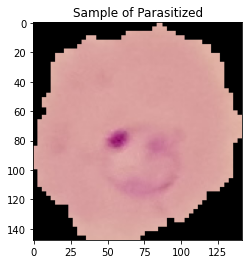

In [11]:
plt.imshow(imread(single_image))
plt.title('Sample of Parasitized')

In [12]:
len(os.listdir(train_path + r'\parasitized'))
len(os.listdir(train_path + r'\Uninfected'))
# train data size

10691

In [13]:
len(os.listdir(test_path + r'\parasitized'))
len(os.listdir(test_path + r'\Uninfected'))
# test data size

3064

Recall that cnn cannot take in any shape of input that to train, all the data must be of the same size
to best find out which size to pick for the dimensions, we should get the mean of all the dimension, the heights and width

In [14]:
dims_1 = []
dims_2 = []


for img_path in tqdm(os.listdir(train_path + r'\Uninfected')):
    img = imread((train_path + '\\Uninfected\\' +img_path ))
    d1,d2,color = img.shape
    dims_1.append(d1)
    dims_2.append(d2)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10691/10691 [00:45<00:00, 235.73it/s]


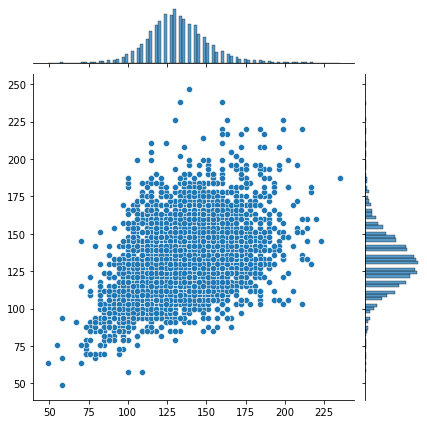

In [15]:
sns.jointplot(x=dims_1,y=dims_2)

In [16]:
# get the mean values of the dimensions
np.mean(dims_1)

131.78383687213545

In [17]:
np.mean(dims_2)

131.39659526704705

In [18]:
# so lets store this as the proposed dimension for all the images
dimension = (130,130,3)

In [19]:
dimension

(130, 130, 3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

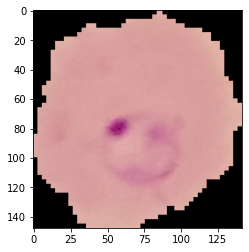

In [22]:
plt.imshow(imread(single_image))

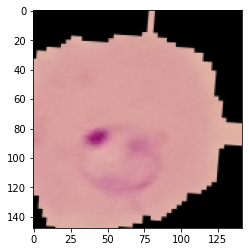

In [23]:
# let's use the image gen to transform an image randomly
plt.imshow(image_gen.random_transform(imread(single_image)))

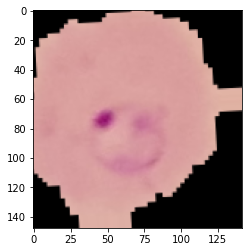

In [24]:
# doing the same thing above will randomly generate a random transformed image 
plt.imshow(image_gen.random_transform(imread(single_image)))

### Generating many manipulated images from a directory


In order to use .flow_from_directory, you must organize the images in sub-directories. This is an absolute requirement, otherwise the method won't work. The directories should only contain images of one class, so one folder per class of images.

Structure Needed:

* Image Data Folder
    * Class 1
        * 0.jpg
        * 1.jpg
        * ...
    * Class 2
        * 0.jpg
        * 1.jpg
        * ...
    * ...
    * Class n

In [25]:
image_gen.flow_from_directory(train_path)

Found 21382 images belonging to 2 classes.


In [26]:
image_gen.flow_from_directory(test_path)

Found 6128 images belonging to 2 classes.


## Build Model

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
#https://stats.stackexchange.com/questions/148139/rules-for-selecting-convolutional-neural-network-hyperparameters

model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=dimension, activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=dimension, activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=dimension, activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 130 by 130 * 3 BEFORE FINAL LAYER
model.add(Flatten())

# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES SO USE SOFTMAX NOT SIGMOID
model.add(Dense(1, activation='sigmoid'))

# COMPILE THE MODEL
# https://keras.io/metrics/
model.compile(loss='binary_crossentropy',optimizer='adam',
             metrics = ['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

In [30]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',patience=2) 
#note we can monintor val_accuracy or any other metric we specify

In [31]:
# number of images to train at a time
batch_size = 16

In [32]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=dimension[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 21382 images belonging to 2 classes.


In [33]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=dimension[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                                shuffle=False)

Found 6128 images belonging to 2 classes.


In [34]:
train_image_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [35]:
results = model.fit( train_image_gen, epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

Epoch 1/20
1337/1337 [==============================] - 1059s 790ms/step - loss: 0.4079 - accuracy: 0.8236 - val_loss: 0.2506 - val_accuracy: 0.9076
Epoch 2/20
1337/1337 [==============================] - 197s 147ms/step - loss: 0.1797 - accuracy: 0.9449 - val_loss: 0.2274 - val_accuracy: 0.9230
Epoch 3/20
1337/1337 [==============================] - 176s 132ms/step - loss: 0.1658 - accuracy: 0.9500 - val_loss: 0.2286 - val_accuracy: 0.9171
Epoch 4/20
1337/1337 [==============================] - 170s 127ms/step - loss: 0.1551 - accuracy: 0.9512 - val_loss: 0.1965 - val_accuracy: 0.9310
Epoch 5/20
1337/1337 [==============================] - 171s 128ms/step - loss: 0.1495 - accuracy: 0.9519 - val_loss: 0.1954 - val_accuracy: 0.9341
Epoch 6/20
1337/1337 [==============================] - 175s 131ms/step - loss: 0.1470 - accuracy: 0.9527 - val_loss: 0.1888 - val_accuracy: 0.9365
Epoch 7/20
1337/1337 [==============================] - 167s 125ms/step - loss: 0.1443 - accuracy: 0.9544 - val

In [36]:
model.save('malaria_detector.h5')

## Evaluate the Model

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
losses = pd.DataFrame(model.history.history)

In [39]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.407926,0.823590,0.250645,0.907637
1,0.179668,0.944860,0.227416,0.922976
2,0.165815,0.950005,0.228585,0.917102
3,0.155138,0.951174,0.196514,0.930973
4,0.149509,0.951922,0.195403,0.934073
5,0.147006,0.952670,0.188825,0.936521
6,0.144264,0.954401,0.178840,0.938153
7,0.145603,0.954448,0.183208,0.937500
8,0.142781,0.955804,0.194176,0.932768


In [40]:
losses.rename(columns={"loss":"Train loss","val_loss":'Test/val loss'},inplace=True)

<AxesSubplot:>

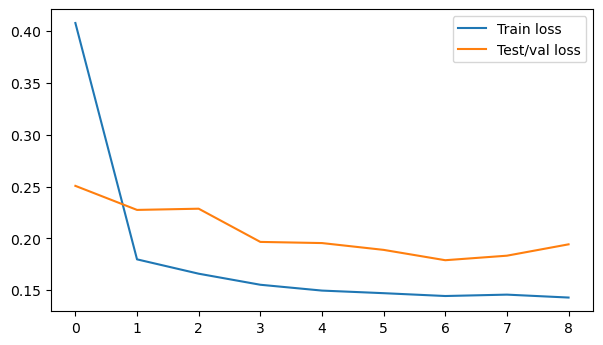

In [41]:
fig,ax = plt.subplots(figsize=(7,4),dpi=100)
losses[['Train loss','Test/val loss']].plot(ax=ax)

<AxesSubplot:>

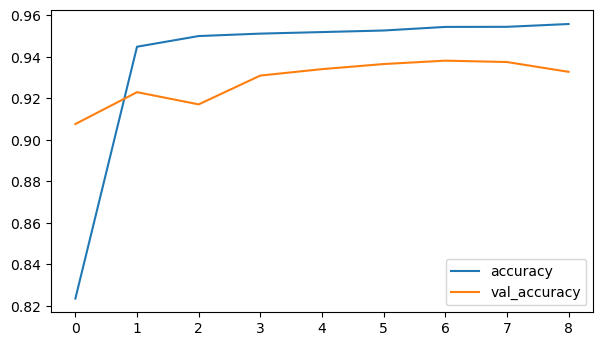

In [42]:
fig,ax = plt.subplots(figsize=(7,4),dpi=100)
losses[['accuracy','val_accuracy']].plot(ax=ax)

In [44]:
model.evaluate(test_image_gen)

383/383 [==============================] - 30s 78ms/step - loss: 0.1967 - accuracy: 0.9298


[0.19669336080551147, 0.9298303127288818]

In [46]:
pred_probabilities = model.predict(test_image_gen)

In [47]:
pred_probabilities

array([[4.1724826e-10],
       [2.1089384e-01],
       [2.4215972e-06],
       ...,
       [9.3995279e-01],
       [9.8862094e-01],
       [9.5137548e-01]], dtype=float32)

In [48]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [49]:
predictions = pred_probabilities > 0.5

In [50]:
# Numpy can treat this as True/False for us
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [51]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3064
           1       0.93      0.94      0.93      3064

    accuracy                           0.93      6128
   macro avg       0.93      0.93      0.93      6128
weighted avg       0.93      0.93      0.93      6128



<AxesSubplot:>

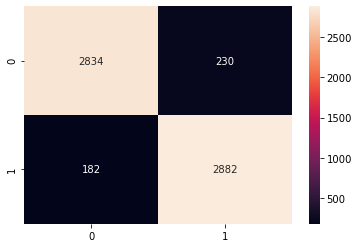

In [54]:
sns.heatmap(confusion_matrix(test_image_gen.classes,predictions),annot=True,fmt='.4g')

## PREDICTIONS

In [75]:
import os 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [76]:
myModel = load_model('malaria_detector.h5')

In [71]:
path = 'C:\\Users\\matty\\Videos\\CODES\\Ann-Learnings\\josh Tensorflow\\DATA\\Cell_Images\\multiplePredTest\\'

In [72]:
folder  = os.fsencode(path)

In [73]:
path

'C:\\Users\\matty\\Videos\\CODES\\Ann-Learnings\\josh Tensorflow\\DATA\\Cell_Images\\multiplePredTest\\'

C:\Users\matty\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


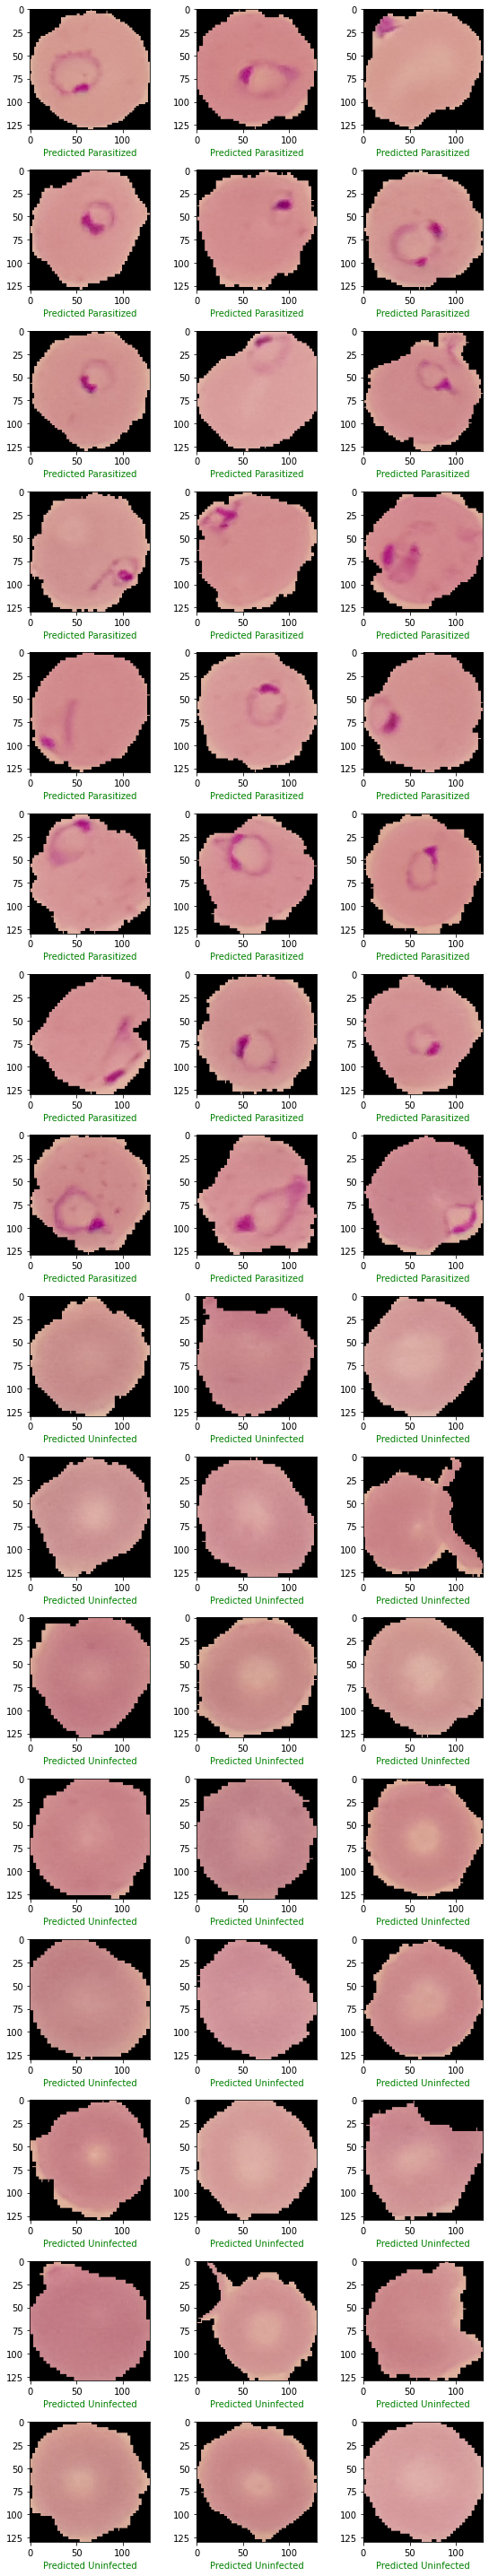

In [77]:
plt.figure(figsize=(8,40))
i=1
for file in os.listdir(folder):
    filename = os.fsdecode(file)
    myFile = path+filename
    myImg = str(myFile)
    TheIMG = image.load_img(myImg,target_size=(130,130))
    newImg = newImg = image.img_to_array(TheIMG)
    newImg =  np.expand_dims(newImg,axis=0)
    newImg = newImg/255
    predicted_class = myModel.predict_classes(newImg)
    Disease_num = predicted_class[0][0]
    if Disease_num == 0:
        Condition = 'Parasitized'
    elif Disease_num == 1:
        Condition = 'Uninfected'
    if (i < 25) and (Condition=='Parasitized'):
        color = 'green'
    elif (i > 24) and (Condition=='Uninfected'):
        color ='green'
    else:
        color = 'red'
    plt.subplot(16,3,i,)    
    plt.imshow(TheIMG)
    plt.xlabel("Predicted {0}".format(Condition),color=color) 
    i = i+1
plt.tight_layout()    